# Лабораторная работа 7. Основы анализа данных Pandas II. 

Проверим, если зимой холодно тепло ли летом. 
Будем использовать статистические данные по погоде в Москве. 
С помощью открытых данных и математической статистики проверим сформулированную выше «народную примету», но и получим довольно неожиданную информацию о связи погоды в разные месяцы, а также своими глазами посмотрим на глобальное потепление.
Чтобы проверить эту гипотезу, нам потребуется вычислить среднюю температуру за каждый из интересующих нас месяцев каждого из 50 лет и вычислить величину, которая называется коэффициентом корреляции Пирсона. К счастью, нам даже не нужно знать, по какой формуле её считать (хотя это и полезно), поскольку Python посчитаёт её за нас. Самое главное — подготовить для этого данные.


Часть 1. Грузим данные
Возможно, необходимо будет установить дополнительно пакеты.  LXML (для Windows используйте неофициальные пакеты http://www.lfd.uci.edu/~gohlke/pythonlibs/#lxml), html5lib, BeautifulSoup4

In [2]:
import pandas as pd
dat = pd.read_html("weather.html", header=0)

Параметр header=0 показывает, что нулевая (то есть первая) строчка должна использоваться как строка заголовков (имён переменных).
На html-страничке ведь может быть несколько таблиц. pd.read_html каждую из них поместит в свой dataframe и создаст список dataframe'ов.
Узнаем количество элементов. 

In [2]:
len(dat)

1

В нём всего один элемент. Извлечём его из списка и назовём тем же именем, что раньше называли список. (Сам список нам больше не понадобится.)

In [2]:
dat = dat[0]
dat.head(3)

,STATION_ID,STATION_NM,DATE_OBS,TMPMAX,Q,TMPMIN,Q.1,TMPMN,Q.2,PRECIP,Q.3,D
0,27612,МОСКВА ВДНХ,1948-01-01,NaN,9,NaN,9,NaN,9,NaN,9,9
1,27612,МОСКВА ВДНХ,1948-01-02,NaN,9,NaN,9,NaN,9,NaN,9,9
2,27612,МОСКВА ВДНХ,1948-01-03,NaN,9,NaN,9,NaN,9,NaN,9,9


Теперь в dat лежит честный dataframe. Часть столбцов имеют понятный без специальных пояснений смысл: TMPMAX — максимальная температура за день, TMPMIN — минимальная, TMPMN — средняя (от слова mean), PRECIP — уровень осадков (precipitation). Ещё есть непонятные столбцы Q и D, значения которых не известны. Название и идентификатор станции нам тоже не слишком нужны. От них можно избавиться, например, вот так.

In [3]:
dat.drop(['STATION_ID', 'STATION_NM', 'Q','Q.1','Q.2','Q.3','D'],inplace=True,axis=1)

Параметр axis=1 означает, что нужно выкинуть столбцы, а не строки, inplace=True означает, что это нужно сделать «на месте», то есть модифицировать dataframe, а не вернуть его версию.

In [4]:
dat.head()

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
0,1948-01-01,NaN,NaN,NaN,NaN
1,1948-01-02,NaN,NaN,NaN,NaN
2,1948-01-03,NaN,NaN,NaN,NaN
3,1948-01-04,NaN,NaN,NaN,NaN
4,1948-01-05,NaN,NaN,NaN,NaN


В строчках за 1948 год нет никаких полезных данных и их надо бы выкинуть. Проще всего это сделать с помощью .dropna — это команда, выкидывающая строки (или столбцы, если вызывать с axis=1), в которых есть неопределенные ячейки (например, содержащие NaN).

In [5]:
dat.dropna(inplace=True)
dat.head()

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
345,1948-12-11,2.4,-4.5,-1.1,0.0
346,1948-12-12,1.9,-8.7,-6.2,0.5
347,1948-12-13,-7.4,-12.3,-10.1,0.0
348,1948-12-14,-5.6,-13.2,-9.4,0.0
349,1948-12-15,-3.6,-9.2,-6.6,0.0


Как видимо, 1948 год начинается не с начала и в нём есть только кусок декабря, так что мы его тоже, пожалуй, выкинем, от греха подальше. Я это сделал, просмотрев табличку вручную и заметив номер нужной мне строчки.

In [6]:
dat.loc[365:370]

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
365,1948-12-31,-1.2,-5.3,-2.3,0.0
366,1949-01-01,-2.1,-6.7,-4.2,0.0
367,1949-01-02,-0.5,-6.7,-1.2,4.2
368,1949-01-03,1.1,-2.1,-0.7,0.0
369,1949-01-04,3.3,0.9,2.3,0.0
370,1949-01-05,4.0,-0.9,1.1,0.8


In [7]:
dat.drop(range(345,366),inplace=True)
dat.head()

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
366,1949-01-01,-2.1,-6.7,-4.2,0.0
367,1949-01-02,-0.5,-6.7,-1.2,4.2
368,1949-01-03,1.1,-2.1,-0.7,0.0
369,1949-01-04,3.3,0.9,2.3,0.0
370,1949-01-05,4.0,-0.9,1.1,0.8


Часть 2.Рисуем. Чтобы убедиться, что всё в порядке, нарисуем несколько картинок.

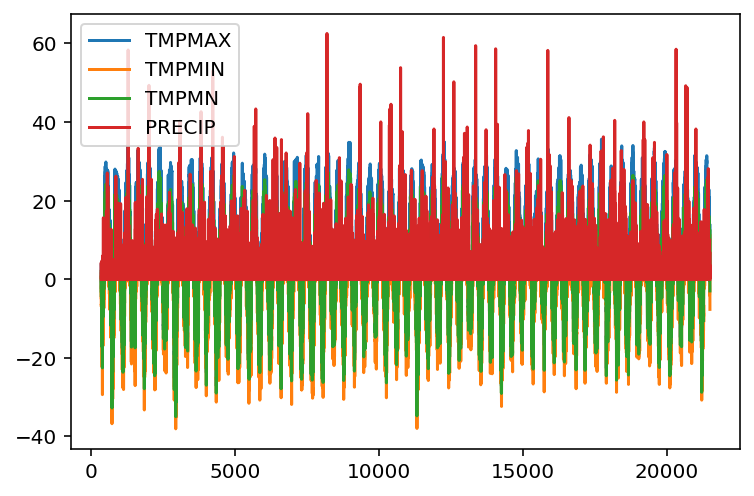

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
dat.plot();

Что-нибудь видно? Не очень. Это потому, что мы попытались вывести на одном графике четыре разных параметра, да ещё и за кучу лет. Давайте возьмём поменьше данных для визуализации.

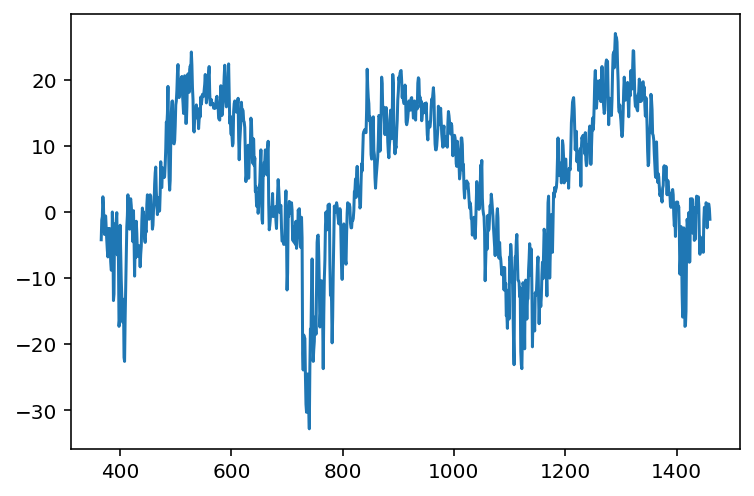

In [10]:
# только средняя температура и данные за три года
dat.iloc[0:365*3]['TMPMN'].plot();

Это график температуры за первые три года наблюдений.

Посмотрим, что происходит в масштабе десятилетий.

c:\python\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=365).mean()
  if __name__ == '__main__':


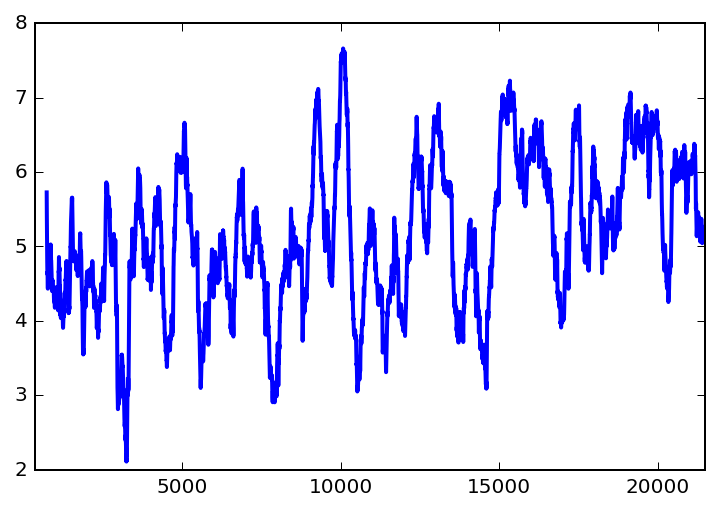

In [15]:
pd.rolling_mean(dat['TMPMN'],365).plot(lw=2,color='blue');

Здесь было сглаживание по годам.

c:\python\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=365).mean()
  if __name__ == '__main__':
c:\python\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=3650).mean()
  from ipykernel import kernelapp as app


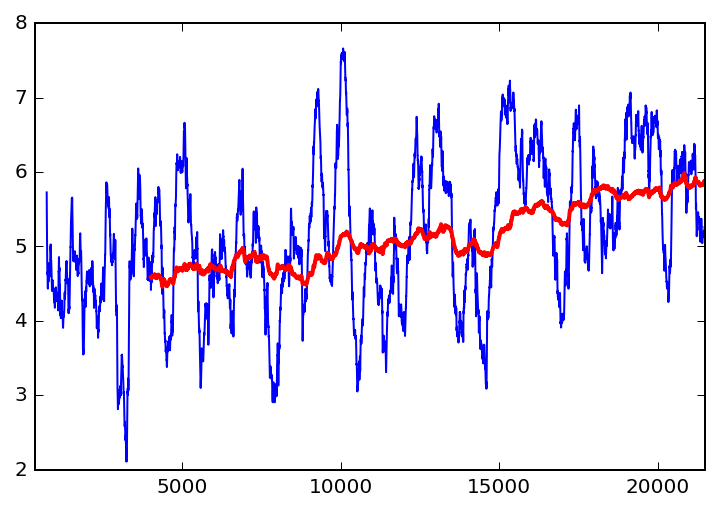

In [16]:
pd.rolling_mean(dat['TMPMN'],365).plot(color='blue')
pd.rolling_mean(dat['TMPMN'],3650).plot(lw=2,color='red');

Сглаживание по годам и десятилетиям на одной картинке.

c:\python\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=3650).mean()
  if __name__ == '__main__':


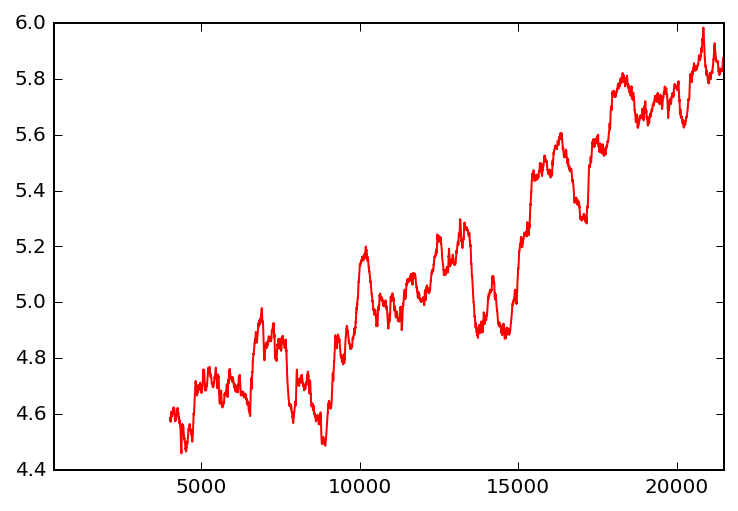

In [17]:
pd.rolling_mean(dat['TMPMN'],3650).plot(color='red');

И, наконец, красный график отдельно. Если вас когда-нибудь интресовал вопрос о том, есть или нет глобальное потепление, то теперь, наверное, он отпал. (Вообще-то такого вопроса нет: климат меняется и действительно теплеет; вопрос, который широко обсуждается — является ли это результатом действий человека или это естественный процесс. Но на него мы так сходу не ответим.)

Часть 3. Упорядочиваем

Картинки красивые, но по горизонтальной оси написана какая-то ерунда. Это потому, что строчки сейчас индексируются числами (да ещё и отсчёт начинается с 367). Для более разумного поведения было бы хорошо индексировать строчки датами из колонки DATE_OBS. В нашем случае проблема осложняется тем, что система не воспринимает эту колонку как колонку с датами. Давайте же решим эту проблему.

In [8]:
dat['DATE_OBS'] = pd.to_datetime(dat['DATE_OBS'])
dat['DATE_OBS']

366     1949-01-01
367     1949-01-02
368     1949-01-03
369     1949-01-04
370     1949-01-05
           ...    
21484   2006-10-27
21485   2006-10-28
21486   2006-10-29
21487   2006-10-30
21488   2006-10-31
Name: DATE_OBS, Length: 21121, dtype: datetime64[ns]

Мы видим dtype: datetime64, что означает, что теперь типом данных являются даты. Сделаем теперь этот столбец индексом.

In [9]:
dat.index=dat['DATE_OBS']
dat.head()

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
DATE_OBS,,,,,
1949-01-01,1949-01-01,-2.1,-6.7,-4.2,0.0
1949-01-02,1949-01-02,-0.5,-6.7,-1.2,4.2
1949-01-03,1949-01-03,1.1,-2.1,-0.7,0.0
1949-01-04,1949-01-04,3.3,0.9,2.3,0.0
1949-01-05,1949-01-05,4.0,-0.9,1.1,0.8


c:\python\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=3650).mean()
  if __name__ == '__main__':


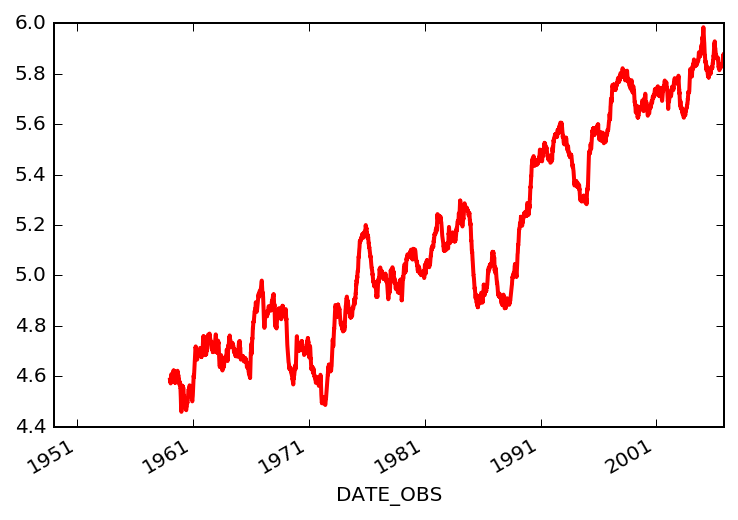

In [20]:
pd.rolling_mean(dat['TMPMN'],3650).plot(lw=2,color='red');

Теперь вертикальная ось подписана верно. Кстати, срезы с датами тоже работают.

In [10]:
from datetime import datetime
dat[datetime(2001,1,25):datetime(2001,2,5)]

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
DATE_OBS,,,,,
2001-01-25,2001-01-25,-6.6,-14.8,-11.0,0.0
2001-01-26,2001-01-26,-3.5,-8.7,-5.3,0.7
2001-01-27,2001-01-27,-0.4,-4.5,-2.5,2.7
2001-01-28,2001-01-28,1.4,-0.4,0.8,3.7
2001-01-29,2001-01-29,2.9,0.8,1.4,1.1
2001-01-30,2001-01-30,1.5,-0.1,0.6,1.4
2001-01-31,2001-01-31,0.1,-1.8,-0.7,0.6
2001-02-01,2001-02-01,-1.7,-7.4,-4.5,0.0
2001-02-02,2001-02-02,-3.0,-12.3,-8.1,13.2


Часть 4. Усредняем

Вернёмся к нашей задаче: верно ли, что более тёплый март — это признак того, что апрель будет более холодным? Иными словами, правда ли, что средняя температура за март и апрель отрицательно скоррелированы? Чтобы это понять, нам потребуется сформировать новую таблицу, в которой наблюдением (то есть строчкой) будет один год, а переменными (то есть столбцами) будет средняя температура за каждый месяц.

Для начала добавим в нашу таблицу столбцы, соответствующие году, месяцу и дню.

In [14]:
dat['Year']=dat.index.year
dat['Mon']=dat.index.month
dat['Day']=dat.index.day
dates=dat[['Year','Mon','Day']]
dates.head()

,Year,Mon,Day
DATE_OBS,,,
1949-01-01,1949,1,1
1949-01-02,1949,1,2
1949-01-03,1949,1,3
1949-01-04,1949,1,4
1949-01-05,1949,1,5


Теперь переопределим индекс более удобным для нас образом.

In [17]:
dat.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)

Предыдущей командой мы создали так называемый *мультииндекс*, то есть индекс с несколькими измерениями. Простейший пример мультииндекса из математики — индекс у матрицы $a_{i,j}$. Можно считать $i$ и $j$ двумя разными индексами, а можно считать пару $(i,j)$ одним мульииндексом. Мультииндекс — способ записать в обычную таблицу многомерную информацию. В данном случае у нас в мультииндексе три измерения — год, месяц, день. Вот так теперь выглядит наш dataframe.

In [15]:
dat.head()

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP,Year,Mon,Day
DATE_OBS,,,,,,,,
1949-01-01,1949-01-01,-2.1,-6.7,-4.2,0.0,1949,1,1
1949-01-02,1949-01-02,-0.5,-6.7,-1.2,4.2,1949,1,2
1949-01-03,1949-01-03,1.1,-2.1,-0.7,0.0,1949,1,3
1949-01-04,1949-01-04,3.3,0.9,2.3,0.0,1949,1,4
1949-01-05,1949-01-05,4.0,-0.9,1.1,0.8,1949,1,5


Нам нужно для каждого года и каждого месяца найти среднюю температуру за этот месяц. Для этого следует сгруппировать элемены таблички по году и месяцу и к тому, что получилось, применить метод .mean().

In [18]:
year_day_mean=dat.groupby(level=[0,1]).mean()
year_day_mean.head()

TMPMAX     TMPMIN      TMPMN    PRECIP    Year  Mon   Day
Year Mon                                                              
1949 1    -1.300000  -6.493548  -3.670968  0.854839  1949.0  1.0  16.0
     2    -3.571429 -11.075000  -7.339286  0.789286  1949.0  2.0  14.5
     3     1.390323  -6.470968  -2.780645  2.419355  1949.0  3.0  16.0
     4     9.056667  -0.066667   4.280000  0.603333  1949.0  4.0  15.5
     5    21.377419   9.093548  15.225806  1.016129  1949.0  5.0  16.0

Почти то, что нужно. Теперь оставим лишь интересующий нас параметр — среднюю температуру за день (усредненную потом ещё и за месяц), то есть TMPMN.

In [19]:
tmpmn=year_day_mean['TMPMN']
tmpmn.head()

Year  Mon
1949  1      -3.670968
      2      -7.339286
      3      -2.780645
      4       4.280000
      5      15.225806
Name: TMPMN, dtype: float64

И сделаем из одномерной таблицы с мультииндексом двумерную таблицу с обычными одномерными индексами:

In [20]:
mon_mean=tmpmn.unstack()
mon_mean.head()

Mon,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1949,-3.670968,-7.339286,-2.780645,4.280000,15.225806,16.973333,17.425806,16.074194,11.506667,4.800000,-0.423333,-4.322581
1950,-18.022581,-6.764286,-2.225806,9.043333,11.738710,15.123333,16.177419,14.080645,11.990000,4.745161,-0.433333,-5.503226
1951,-12.138710,-12.264286,-3.996774,8.403333,9.738710,17.706667,18.590323,18.325806,11.990000,2.780645,-4.810000,-1.251613
1952,-4.135484,-7.096552,-9.106452,5.166667,10.358065,17.340000,17.870968,16.848387,12.136667,3.925806,-1.133333,-5.883871
1953,-10.403226,-15.614286,-2.606452,7.183333,11.645161,19.193333,19.025806,17.290323,10.046667,5.790323,-3.156667,-5.632258


Вот теперь совсем то, что нужно! Дадим месяцам осмысленные имена.

In [21]:
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul',
                  'Aug','Sep','Oct','Nov','Dec']

Часть 5. Считаем.
Барабанная дробь! Торжественный момент: мы наконец можем посчитать интересующие нас корреляции! Та-дам!

In [22]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.384755,0.257302,0.216484,0.047153,0.039691,0.206568,-0.120758,0.134955,0.117936,-0.142560,-0.059667
Feb,0.384755,1.000000,0.379095,0.216300,0.017000,0.028284,0.252928,-0.097432,0.033740,0.071301,0.059700,-0.012276
Mar,0.257302,0.379095,1.000000,0.328143,0.071455,0.177538,0.091281,0.022202,-0.081379,-0.037189,-0.031521,-0.075481
Apr,0.216484,0.216300,0.328143,1.000000,0.041331,0.017182,0.159124,-0.117359,0.028134,0.037973,0.077483,0.000211
May,0.047153,0.017000,0.071455,0.041331,1.000000,-0.121644,0.028159,0.118944,0.038196,0.178622,0.175155,-0.156485
Jun,0.039691,0.028284,0.177538,0.017182,-0.121644,1.000000,0.306204,0.093280,-0.060803,0.111169,-0.370548,0.150160
Jul,0.206568,0.252928,0.091281,0.159124,0.028159,0.306204,1.000000,0.411425,0.131770,0.132230,0.000195,0.053797
Aug,-0.120758,-0.097432,0.022202,-0.117359,0.118944,0.093280,0.411425,1.000000,0.222137,0.179547,0.123741,0.002483
Sep,0.134955,0.033740,-0.081379,0.028134,0.038196,-0.060803,0.131770,0.222137,1.000000,0.277824,0.077645,0.054884
Oct,0.117936,0.071301,-0.037189,0.037973,0.178622,0.111169,0.132230,0.179547,0.277824,1.000000,0.146520,-0.031469


На табличку с цифрами смотреть не очень приятно, так что мы лучше нарисуем картинку.

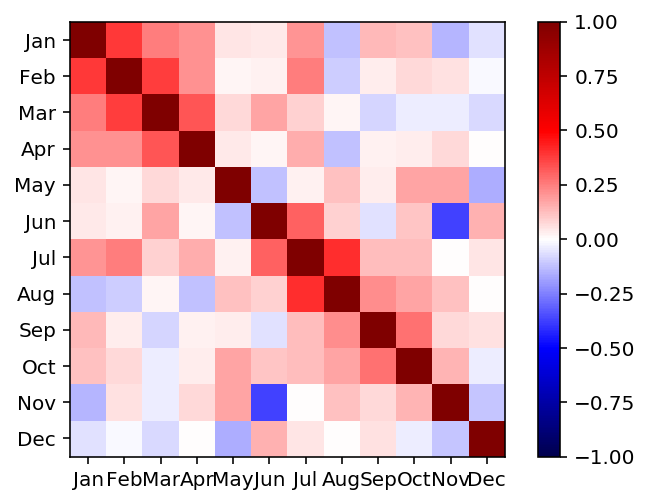

In [22]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns);

Красные квадратики означают положительную корреляцию, синие — отрицательную. Как видим, исходное утверждение «если март тёплый, то апрель будет холодным», подтвердилось с точностью до наоборот — корреляция положительная. А вот между июнем и ноябрём — отрицательная. (Интересно, почему так? Это действительно есть такой эффект или просто артефакт наших данных?)

Проиллюстрируем утверждение о корреляциях на графиках, которые называются точечными диаграммами или диаграммами рассеяния (scatter plot).

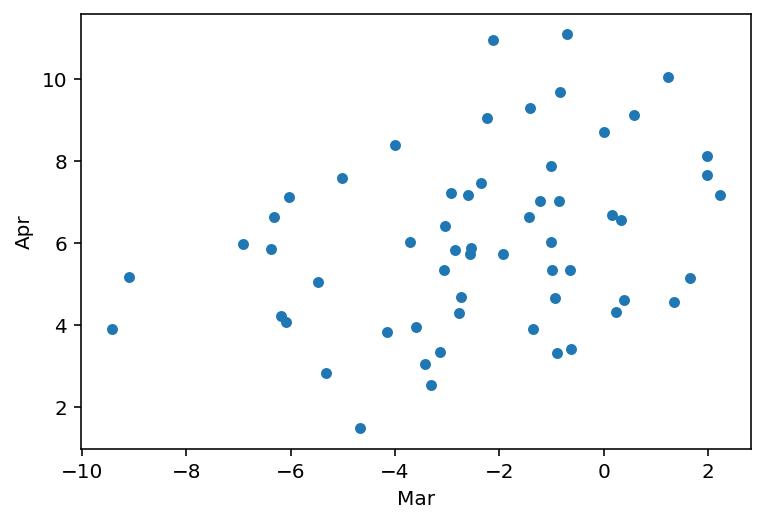

In [23]:
mon_mean.plot(kind='scatter',x='Mar',y='Apr');

Каждая точка на графике — это один год, по горизонтальной оси отмечена средняя температура за март, а по вертикальной — за апрель. Видно, что график немного вытянут вдоль диагонали, которая идёт «из левого нижнего угла в правый верхний» — это и соответствует наличию положительной корреляции.

А вот аналогичный график для пары июнь — ноябрь:

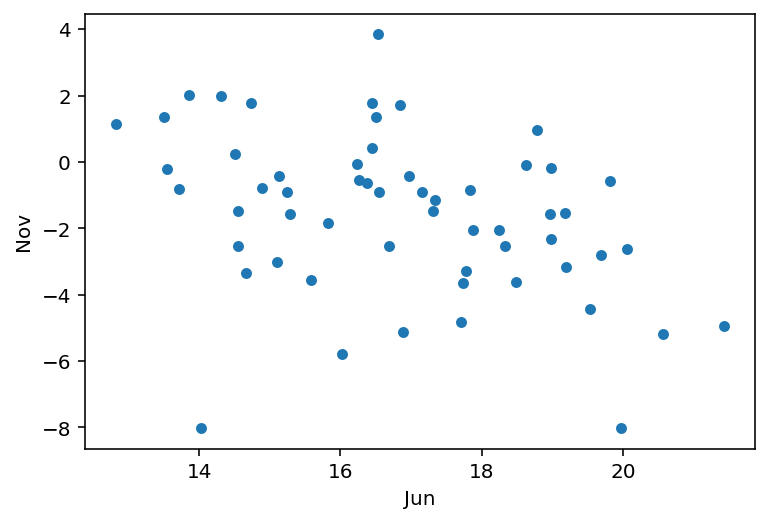

In [24]:
mon_mean.plot(kind='scatter',x='Jun',y='Nov');

На сколько градусов растёт в среднем температура за один год? (Посчитать регрессию с помощью statsmodels.)

In [26]:
import statsmodels.formula.api as smf

result = smf.ols('Jan~Dec', data=mon_mean).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Jan   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.1965
Date:                Thu, 28 May 2020   Prob (F-statistic):              0.659
Time:                        23:47:55   Log-Likelihood:                -160.38
No. Observations:                  57   AIC:                             324.8
Df Residuals:                      55   BIC:                             328.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6270      1.124     -7.676      0.000     -10.879      -6.375
Dec           -0.0744      0.168     -0.443      0.659      -0.411       0.262
==============================================================================
Omnibus:                        5.214   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.195
Skew:                          -0.719   Prob(JB):                       0.0745
Kurtosis:                       2.652   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Известна поговорка «после дождичка в четверг» (о маловероятном событии). Проверить с помощью теста Стьюдента, отличается ли статистически значимо уровень осадков (PRECIP), выпадающих по четвергам, от уровня осадков в остальные дни недели? (dat.index.weekday.)

In [11]:
dat['Weekday']=dat.index.weekday
dat['Year']=dat.index.year
dates=dat[['Year', 'Weekday']]
dat.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
dat.head()

DATE_OBS  TMPMAX  TMPMIN  TMPMN  PRECIP  Weekday  Year
Year Weekday                                                         
1949 5       1949-01-01    -2.1    -6.7   -4.2     0.0        5  1949
     6       1949-01-02    -0.5    -6.7   -1.2     4.2        6  1949
     0       1949-01-03     1.1    -2.1   -0.7     0.0        0  1949
     1       1949-01-04     3.3     0.9    2.3     0.0        1  1949
     2       1949-01-05     4.0    -0.9    1.1     0.8        2  1949

In [13]:
sr = dat.groupby(level=[0,1]).mean()
sr.head()

TMPMAX    TMPMIN     TMPMN    PRECIP  Weekday  Year
Year Weekday                                                        
1949 0         9.898077  1.598077  5.559615  1.532692        0  1949
     1        10.253846  1.784615  5.882692  2.007692        1  1949
     2        10.246154  2.038462  5.892308  2.571154        2  1949
     3        10.290385  1.834615  5.813462  1.957692        3  1949
     4         9.892308  1.521154  5.644231  0.957692        4  1949

In [14]:
osadki=sr['PRECIP']
osadki

Year  Weekday
1949  0          1.532692
      1          2.007692
      2          2.571154
      3          1.957692
      4          0.957692
                   ...   
2006  2          2.276744
      3          1.416279
      4          2.281395
      5          1.465116
      6          2.527273
Name: PRECIP, Length: 406, dtype: float64

In [23]:
osadki.unstack().corr()

Weekday,0,1,2,3,4,5,6
Weekday,,,,,,,
0,1.000000,0.464402,0.319808,0.283420,0.052025,-0.081761,0.138041
1,0.464402,1.000000,0.278178,0.402040,0.154334,0.107139,-0.002399
2,0.319808,0.278178,1.000000,0.460101,0.082528,-0.074733,-0.063410
3,0.283420,0.402040,0.460101,1.000000,0.202877,0.246200,0.018814
4,0.052025,0.154334,0.082528,0.202877,1.000000,0.287358,0.030363
5,-0.081761,0.107139,-0.074733,0.246200,0.287358,1.000000,0.145943
6,0.138041,-0.002399,-0.063410,0.018814,0.030363,0.145943,1.000000


Часть 6. Дополните данными с 2007 по 2017 год для Москвы с файла lab4_moscow07-16. 


In [3]:
dat = pd.read_csv("lab7_moscow07-16.csv",skiprows = 6, encoding='windows-1251', sep=';')
dat.head()

D:\Python\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (21,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
19.10.2016 21:00,1.9,760.6,775.6,0.0,79.0,"Ветер, дующий с северо-востока",1.0,NaN,NaN,100%.,...,NaN,NaN,-1.4,Осадков нет,12.0,NaN,NaN,NaN,NaN,NaN
19.10.2016 18:00,1.9,760.6,775.6,-0.1,80.0,"Ветер, дующий с северо-запада",1.0,NaN,NaN,100%.,...,NaN,NaN,-1.3,Следы осадков,12.0,NaN,NaN,NaN,NaN,NaN
19.10.2016 15:00,2.5,760.7,775.7,-0.3,72.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,100%.,...,NaN,10.0,-2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.10.2016 12:00,2.2,761.0,776.1,0.1,76.0,"Ветер, дующий с северо-северо-запада",1.0,NaN,NaN,100%.,...,NaN,10.0,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.10.2016 09:00,1.9,760.9,775.9,0.3,80.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,100%.,...,NaN,10.0,-1.2,Следы осадков,12.0,Поверхность почвы влажная.,3.0,NaN,NaN,NaN


Постройте аналогичную таблицу корреляции для этих годов. 

In [4]:
dat.drop(['T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tx', 'Cl', 'Nh', 'H', 'Cm',  'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E\'', 'sss', 'Местное время в Москве (ВДНХ)'],inplace=True,axis=1)
dat.dropna(inplace=True)
dat.head()

,Tn
19.10.2016 21:00,2.5
18.10.2016 21:00,3.6
17.10.2016 21:00,4.8
16.10.2016 21:00,5.2
15.10.2016 21:00,4.8


In [5]:
dat.index = pd.to_datetime(dat.index)
dat['Year']=dat.index.year
dat['Mon']=dat.index.month
dat['Day']=dat.index.day
dates=dat[['Year','Mon','Day']]
dat.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
temp=dat.groupby(level=[0,1]).mean()
temp.head()

Tn    Year  Mon        Day
Year Mon                                   
2007 1     1.740000  2007.0  1.0  16.333333
     2    -0.465517  2007.0  2.0  14.482759
     3    10.661290  2007.0  3.0  16.000000
     4    11.406667  2007.0  4.0  15.500000
     5    19.976667  2007.0  5.0  16.000000

In [10]:
temp_two=temp['Tn'].unstack()
temp_two.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug','Sep','Oct','Nov','Dec']
correct=temp_two.corr()
correct

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.194169,0.310455,-0.537870,-0.486562,-0.146974,-0.714580,-0.115337,-0.189745,0.413644,0.242546,0.221312
Feb,0.194169,1.000000,0.107176,0.051012,-0.193373,-0.145092,-0.143967,-0.206137,-0.048518,0.307843,0.493873,0.375378
Mar,0.310455,0.107176,1.000000,-0.325902,0.160132,-0.263662,0.049301,0.362286,0.354882,-0.151717,-0.223018,0.199717
Apr,-0.537870,0.051012,-0.325902,1.000000,0.220829,0.193579,0.319830,-0.091448,-0.078498,-0.096270,0.118409,-0.077554
May,-0.486562,-0.193373,0.160132,0.220829,1.000000,0.188170,0.084447,0.325878,0.217541,-0.482542,-0.413402,0.140161
Jun,-0.146974,-0.145092,-0.263662,0.193579,0.188170,1.000000,0.269967,0.542576,-0.460392,0.496379,0.531372,0.573891
Jul,-0.714580,-0.143967,0.049301,0.319830,0.084447,0.269967,1.000000,0.412246,0.181559,-0.186821,0.105135,0.113325
Aug,-0.115337,-0.206137,0.362286,-0.091448,0.325878,0.542576,0.412246,1.000000,-0.292230,0.221341,0.019358,0.625380
Sep,-0.189745,-0.048518,0.354882,-0.078498,0.217541,-0.460392,0.181559,-0.292230,1.000000,-0.816747,-0.446287,-0.264196
Oct,0.413644,0.307843,-0.151717,-0.096270,-0.482542,0.496379,-0.186821,0.221341,-0.816747,1.000000,0.629963,0.341649


Постройте картинку. 

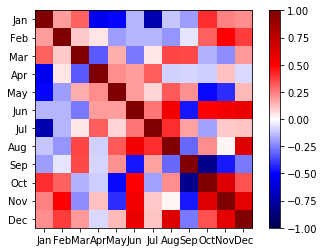

In [11]:
import matplotlib.pyplot as plt
plt.imshow(correct,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),correct.columns)
plt.yticks(range(len(corr)),correct.columns);

И 2 графика, аналогичным выше.

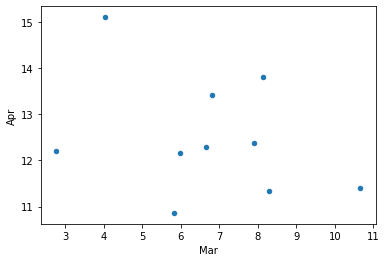

In [13]:
temp_two.plot(kind='scatter',x='Mar',y='Apr');

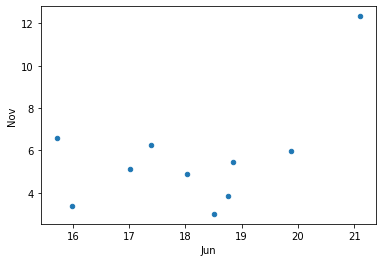

In [14]:
temp_two.plot(kind='scatter',x='Jun',y='Nov');

Вывод: сентябрь - октябрь, ноябрь - отрицательная корреляция; июнь - ноябрь, декабрь - положительная.

Часть 7. Сделайте все тоже самое для Гродно. Используйте файл lab4_grodno07-16.

In [15]:
dat = pd.read_csv("lab7_grodno07-16.csv",skiprows = 6, encoding='windows-1251', sep=';')
dat.head()

,Местное время в Гродно (аэропорт),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
19.10.2016 21:00,6.0,753.6,767.4,0.0,69.0,"Ветер, дующий с юго-востока",5.0,NaN,NaN,"90 или более, но не 100%",...,NaN,10.0,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.10.2016 18:00,7.0,753.6,767.3,-0.1,67.0,"Ветер, дующий с юго-востока",5.0,NaN,NaN,70 – 80%.,...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.10.2016 15:00,6.4,753.7,767.5,-0.3,66.0,"Ветер, дующий с юго-востока",5.0,NaN,NaN,70 – 80%.,...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.10.2016 12:00,4.5,754.0,767.8,0.0,79.0,"Ветер, дующий с юго-востока",5.0,NaN,NaN,70 – 80%.,...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.10.2016 09:00,0.8,754.0,768.1,-0.4,85.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,70 – 80%.,...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dat.drop(['T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tx', 'Cl', 'Nh', 'H', 'Cm',  'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E\'', 'sss', 'Местное время в Гродно (аэропорт)'],inplace=True,axis=1)
dat.dropna(inplace=True)
dat.head()

,Tn
19.10.2016 21:00,7.5
18.10.2016 21:00,9.0
17.10.2016 21:00,8.4
16.10.2016 21:00,6.3
15.10.2016 21:00,2.7


In [18]:
dat.index = pd.to_datetime(dat.index)
dat['Year']=dat.index.year
dat['Mon']=dat.index.month
dat['Day']=dat.index.day
dates=dat[['Year','Mon','Day']]
dat.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
temp=dat.groupby(level=[0,1]).mean()
temp.head()

Tn    Year  Mon   Day
Year Mon                              
2007 1     5.538710  2007.0  1.0  16.0
     2     3.135714  2007.0  2.0  14.5
     3    12.070968  2007.0  3.0  16.0
     4    13.790000  2007.0  4.0  15.5
     5    19.170968  2007.0  5.0  16.0

In [19]:
temp_two=temp['Tn'].unstack()
temp_two.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug','Sep','Oct','Nov','Dec']
correct=temp_two.corr()
correct

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.163623,0.205556,-0.062667,-0.107919,0.400981,-0.659199,0.580575,0.146599,0.077885,0.134148,0.232645
Feb,0.163623,1.000000,0.186835,-0.448081,-0.183772,0.206633,-0.117909,0.461849,-0.078331,0.656243,0.414026,0.460977
Mar,0.205556,0.186835,1.000000,0.167347,0.064079,-0.167639,0.266688,0.135780,0.518767,0.090396,-0.321336,-0.058492
Apr,-0.062667,-0.448081,0.167347,1.000000,0.145276,-0.329555,0.160840,-0.460943,0.374090,-0.221305,-0.497385,-0.330197
May,-0.107919,-0.183772,0.064079,0.145276,1.000000,0.644046,0.242992,0.115048,0.178584,0.333110,-0.078219,0.460606
Jun,0.400981,0.206633,-0.167639,-0.329555,0.644046,1.000000,-0.366512,0.473813,-0.050074,0.402380,0.513379,0.772997
Jul,-0.659199,-0.117909,0.266688,0.160840,0.242992,-0.366512,1.000000,-0.169836,0.356121,0.116619,-0.249325,-0.018549
Aug,0.580575,0.461849,0.135780,-0.460943,0.115048,0.473813,-0.169836,1.000000,0.368840,0.331396,0.388936,0.674710
Sep,0.146599,-0.078331,0.518767,0.374090,0.178584,-0.050074,0.356121,0.368840,1.000000,-0.264106,0.111451,0.258591
Oct,0.077885,0.656243,0.090396,-0.221305,0.333110,0.402380,0.116619,0.331396,-0.264106,1.000000,-0.009438,0.538274


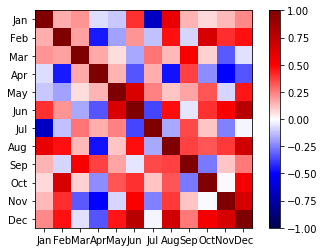

In [20]:
import matplotlib.pyplot as plt
plt.imshow(correct,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),correct.columns)
plt.yticks(range(len(corr)),correct.columns);

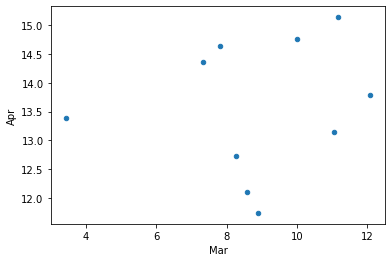

In [21]:
temp_two.plot(kind='scatter',x='Mar',y='Apr');

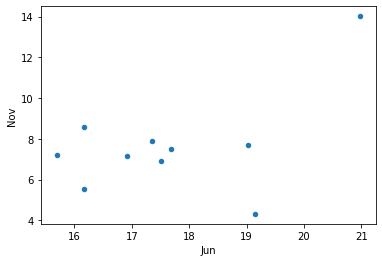

In [22]:
temp_two.plot(kind='scatter',x='Jun',y='Nov');

Вывод: апрель - февраль, август, ноябрь - отрицательная корреляция; 
    декабрь - октябрь, ноябрь - положительная.